In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

import os

In [ ]:
save_path = ('figures/1a3/real')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_CLASSES = 3

no_folds = 5

# repeat everything 10 times
no_exps = 10

l_r = 0.01
epochs = 1000
batch_size = 8
seed = 10

hidden_units =[5,10,15,20,25]

np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')

X, Y = train_input[1:, :21], train_input[1:,-1].astype(int)

X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
Y = Y-1

no_data = len(X)
idx = np.arange(no_data)
np.random.shuffle(idx)
trainX, trainY= X[idx],Y[idx]

In [6]:
trainX = trainX[:1488]
trainY = trainY[:1488]

no_data = len(trainX)

In [7]:
nf = no_data//no_folds

In [8]:
# go through all the different neuron value in 1 fold, before giving acc from each neuron value
test_acc = []
train_acc=[]
def train_exp(X,Y):
    acc = []
    
    for fold in range(no_folds):
        start, end = fold*nf, (fold+1)*nf
        x_test, y_test = trainX[start:end], trainY[start:end]
        x_train  = np.append(trainX[:start], trainX[end:], axis=0)
        y_train = np.append(trainY[:start], trainY[end:], axis=0) 

        acc_ = []

        for no_hidden in hidden_units:

            model = keras.Sequential([
                keras.layers.Dense(no_hidden, activation='relu',kernel_regularizer=l2(0.000001)),
                keras.layers.Dense(NUM_CLASSES, activation='softmax')])


            model.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

            history = model.fit(x_train, y_train,
                                epochs=epochs,
                                verbose=0,
                                use_multiprocessing=True,
                                batch_size = batch_size,
                                validation_data=(x_test, y_test))

            
            acc_.append(history.history['val_accuracy'][epochs-1])

            test_acc.append(history.history['val_accuracy'])
            train_acc.append(history.history['accuracy'])
            

        acc.append(acc_)
        print(fold)
        
        

    cv_acc = np.mean(np.array(acc), axis = 0)

    return cv_acc

In [9]:
acc = []
# Repeat everything fror 10 times 
for exp in range(no_exps):
    
    acc.append(train_exp(trainX,trainY))
    print('exp %d, cv acc %s'%(exp, acc[exp]))

print(acc)
mean_acc = np.mean(np.array(acc), axis = 0)
print('accuracy %s'%(mean_acc))
print('* hidden units %d *'%hidden_units[np.argmax(mean_acc)])

0
1
2
3
4
exp 0, cv acc [0.89562291 0.89427609 0.8956229  0.90303031 0.90370369]
0
1
2
3
4
exp 1, cv acc [0.89966328 0.8962963  0.90303029 0.9084175  0.91178452]
0
1
2
3
4
exp 2, cv acc [0.8969697  0.89360271 0.90033669 0.91178451 0.90639729]
0
1
2
3
4
exp 3, cv acc [0.8969697  0.9050505  0.9077441  0.90572389 0.91111109]
0
1
2
3
4
exp 4, cv acc [0.89696971 0.90168349 0.9111111  0.9070707  0.9077441 ]
0
1
2
3
4
exp 5, cv acc [0.89831649 0.9037037  0.89831651 0.90639728 0.90505049]
0
1
2
3
4
exp 6, cv acc [0.8976431  0.89966329 0.9124579  0.91313131 0.9104377 ]
0
1
2
3
4
exp 7, cv acc [0.8956229  0.9030303  0.89629629 0.9077441  0.91111109]
0
1
2
3
4
exp 8, cv acc [0.9023569  0.9010101  0.9050505  0.90370369 0.90235691]
0
1
2
3
4
exp 9, cv acc [0.89966331 0.90168349 0.9043771  0.90976431 0.9037037 ]
[array([0.89562291, 0.89427609, 0.8956229 , 0.90303031, 0.90370369]), array([0.89966328, 0.8962963 , 0.90303029, 0.9084175 , 0.91178452]), array([0.8969697 , 0.89360271, 0.90033669, 0.911784

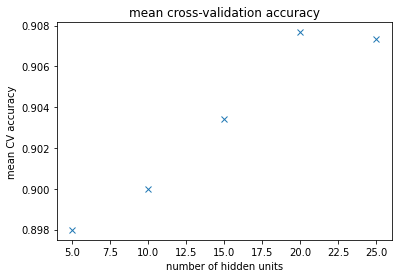

In [17]:
plt.figure(1)
plt.plot([5,10,15,20,25], mean_acc, marker = 'x', linestyle = 'None')
plt.title('mean cross-validation accuracy')
plt.xlabel('number of hidden units')
plt.ylabel('mean CV accuracy')
plt.savefig('./%s/mean_CV_acc.png'%(save_path))

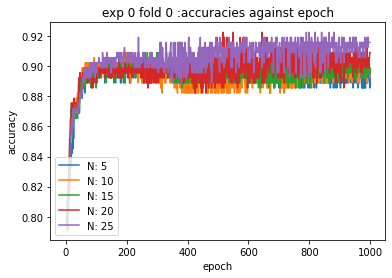

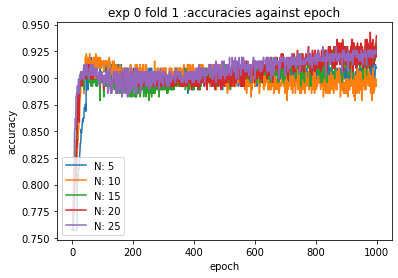

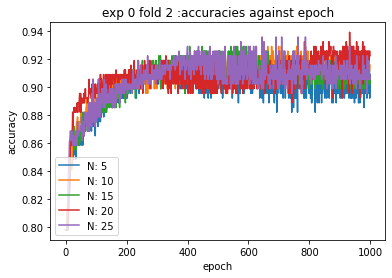

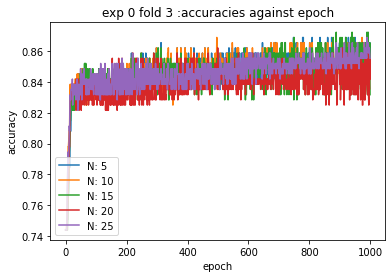

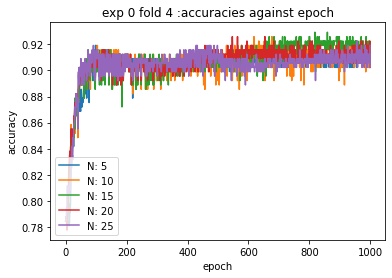

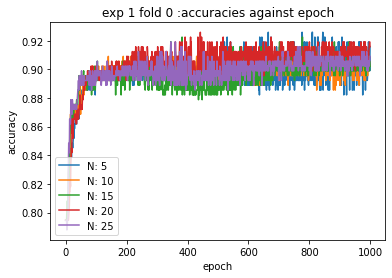

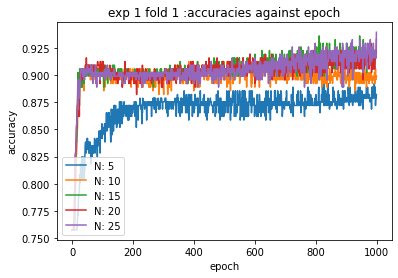

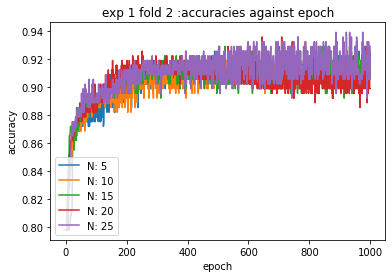

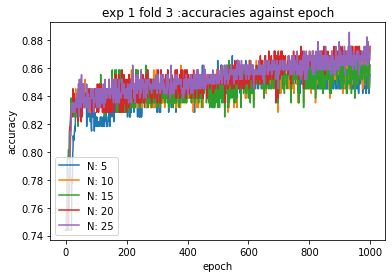

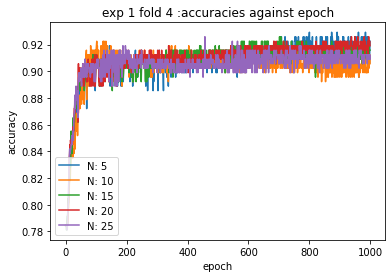

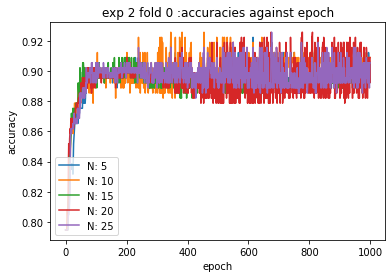

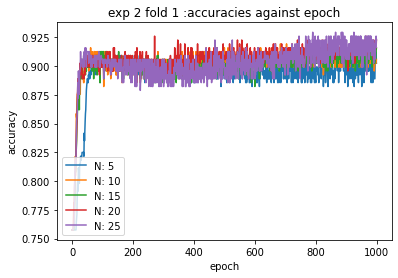

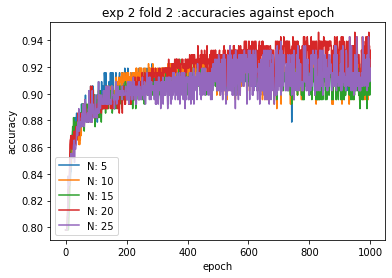

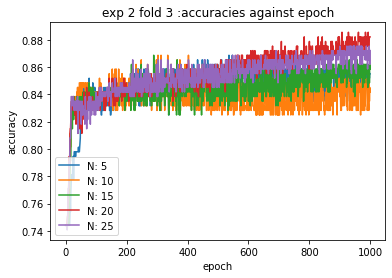

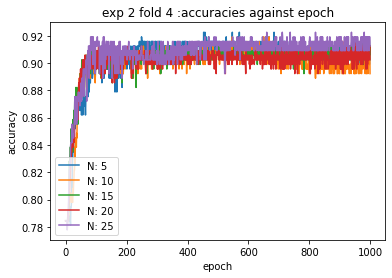

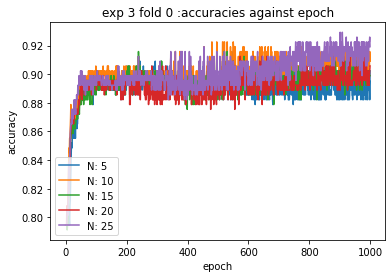

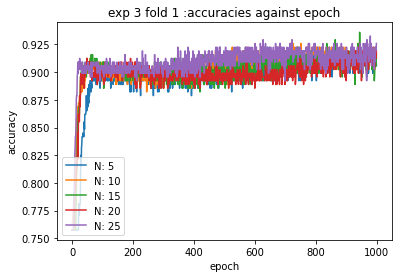

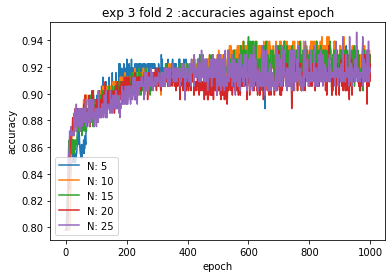

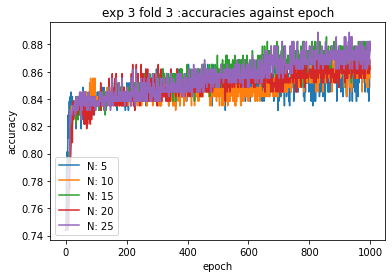

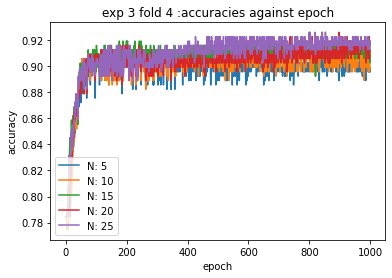

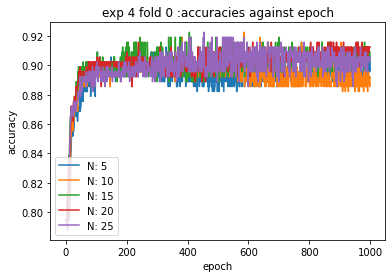

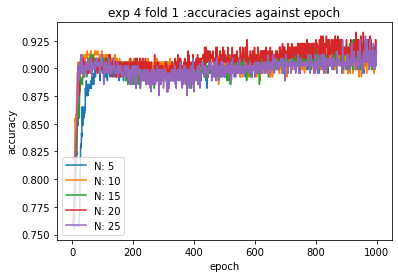

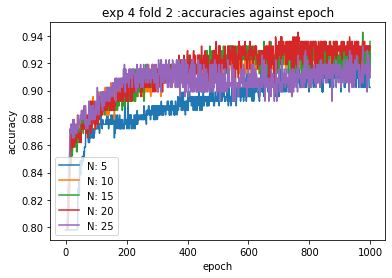

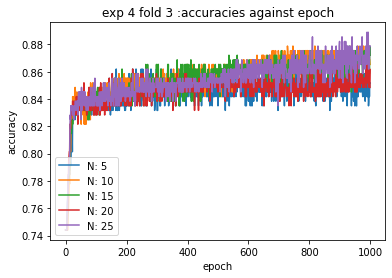

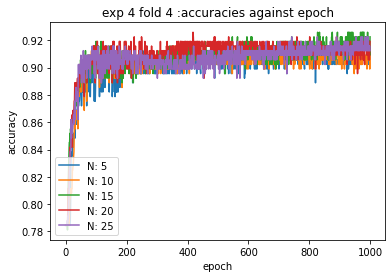

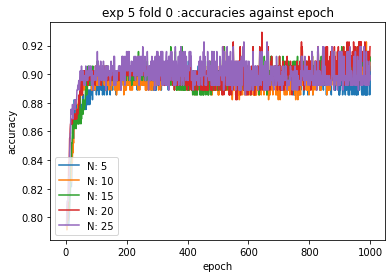

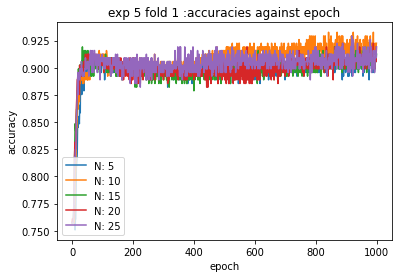

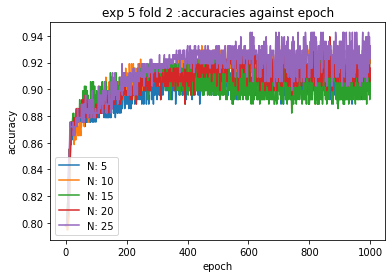

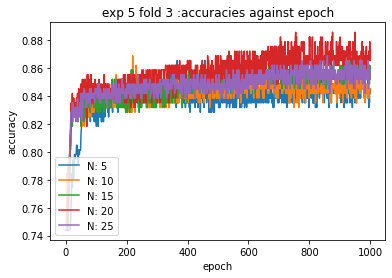

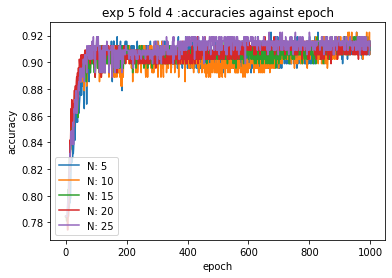

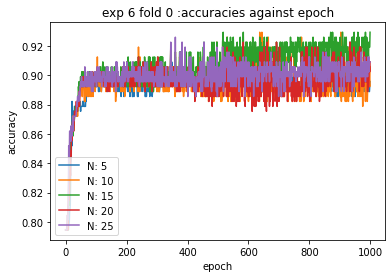

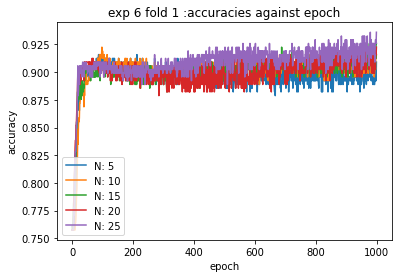

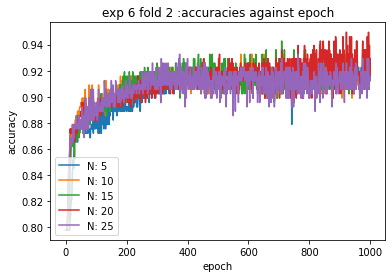

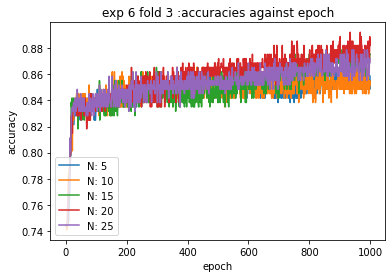

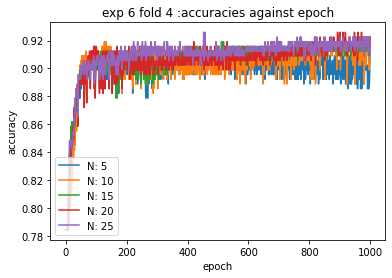

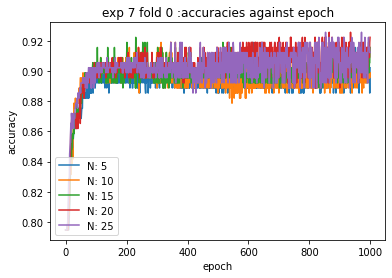

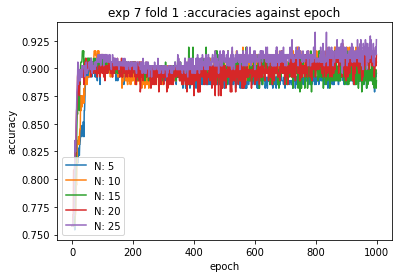

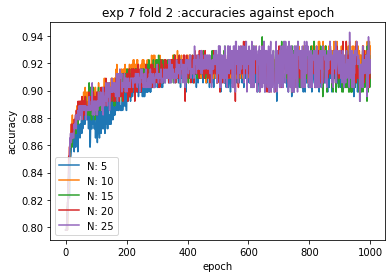

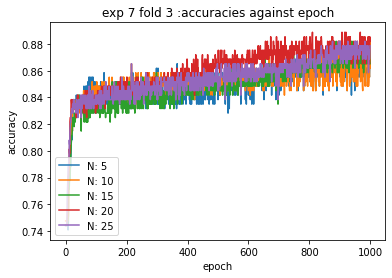

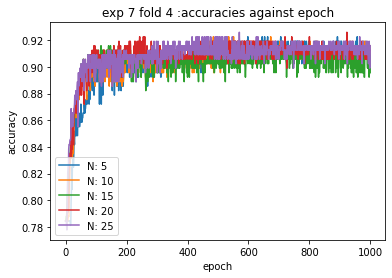

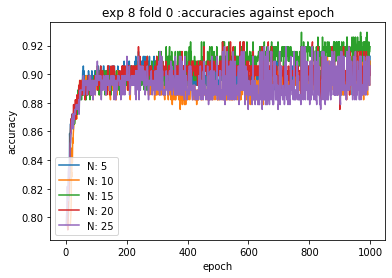

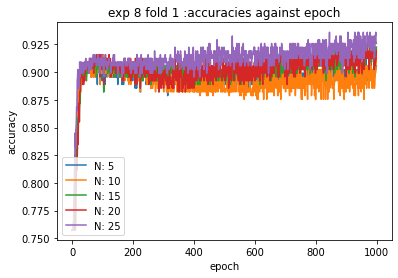

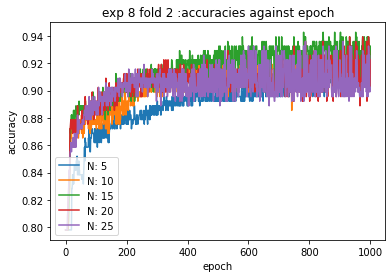

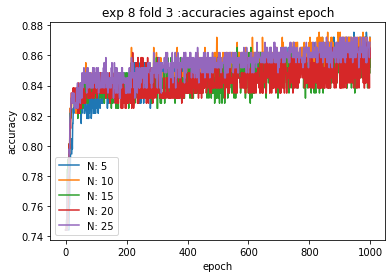

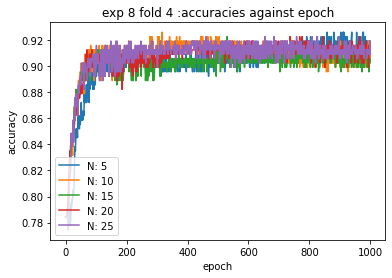

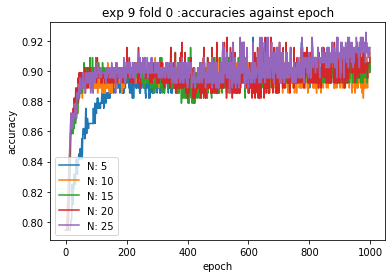

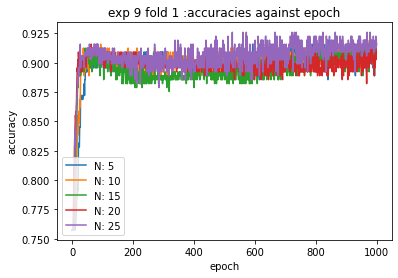

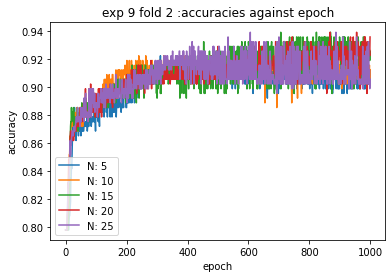

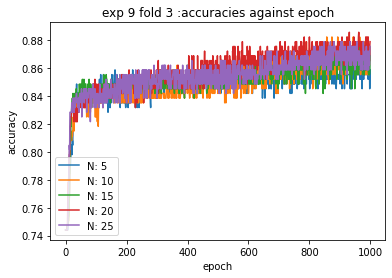

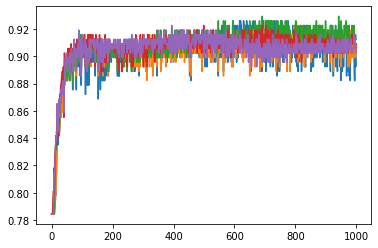

In [18]:
fold_no=0
exp_no =0
for i in range(len(test_acc)):
    if (i!=0 and i%5==0):
        plt.title("exp %d fold %d :accuracies against epoch"%(exp_no,fold_no))
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['N: 5', 'N: 10','N: 15','N: 20','N: 25'], loc='lower left')
        plt.savefig("./%s/ex%d_fold%d_acc_vs_e.png"%(save_path,exp_no,fold_no))
        plt.show()
        plt.plot(test_acc[i])
        fold_no = fold_no + 1
        if (fold_no == 5):
            fold_no = 0
            exp_no = exp_no + 1
            
    else:
        plt.plot(test_acc[i])

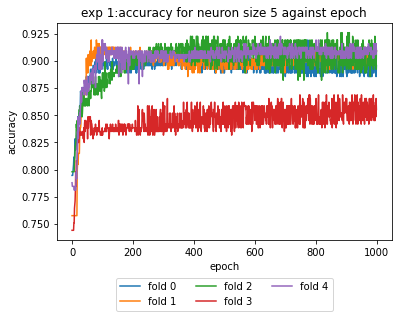

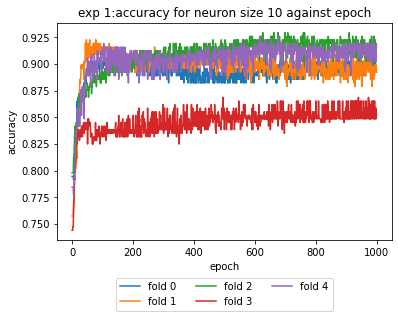

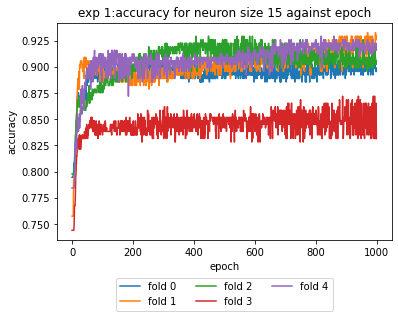

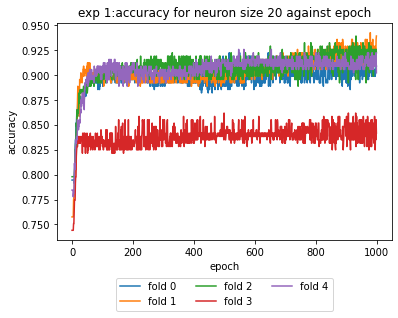

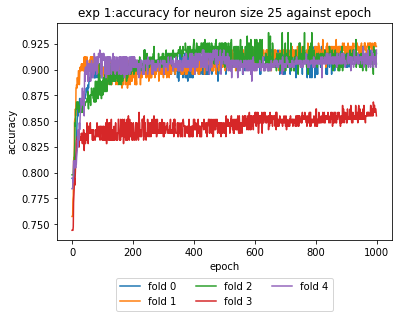

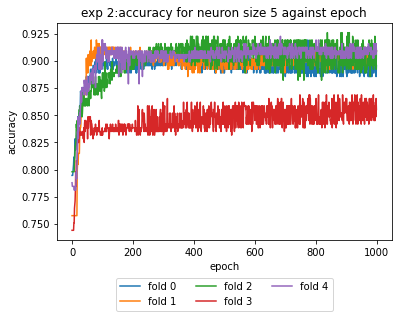

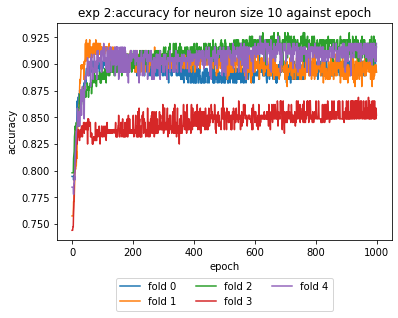

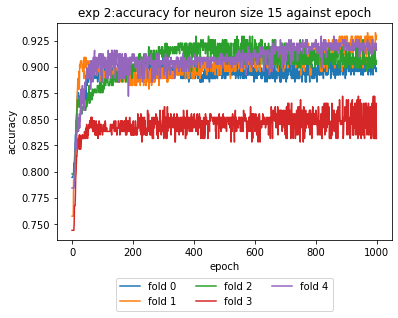

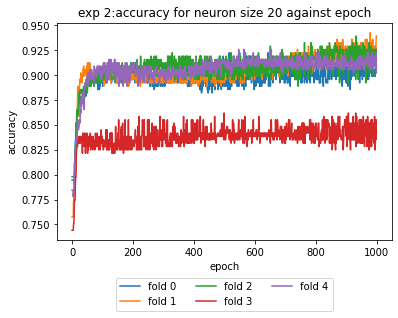

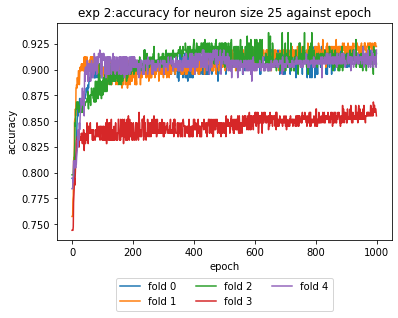

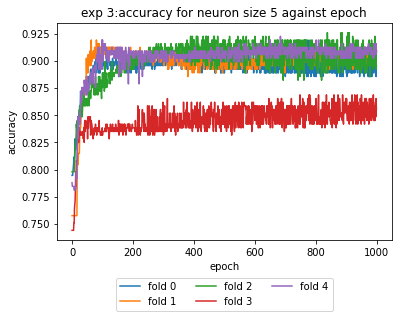

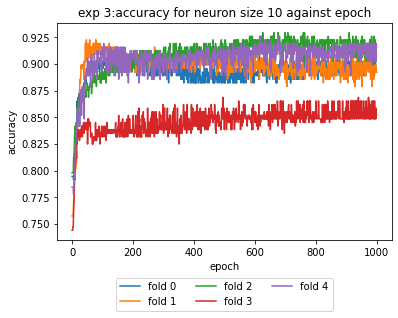

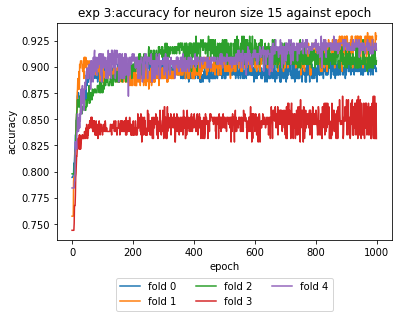

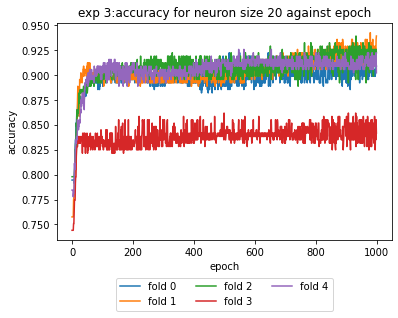

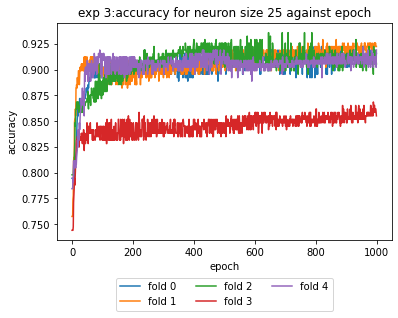

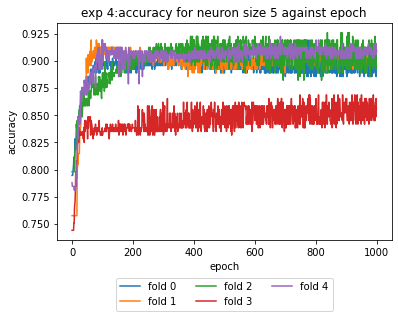

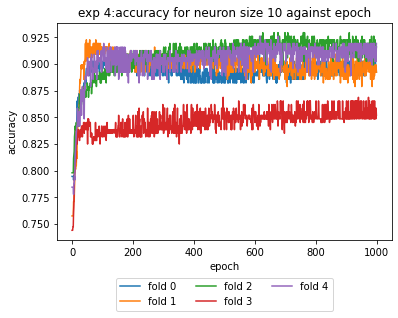

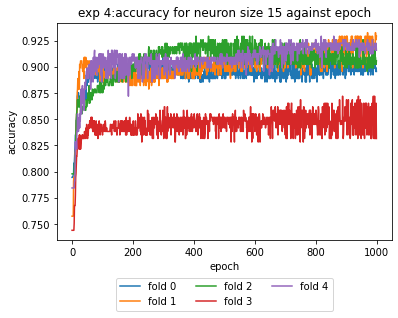

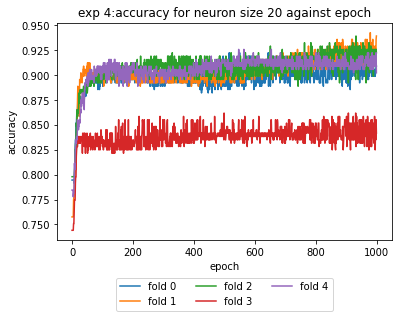

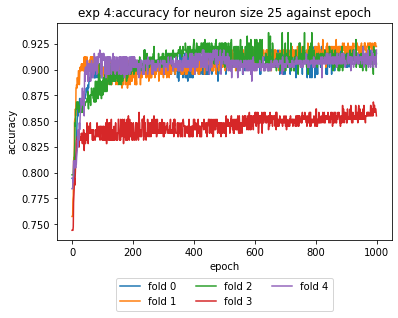

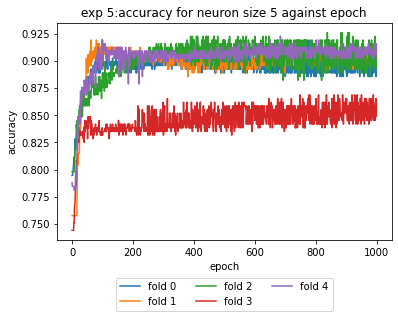

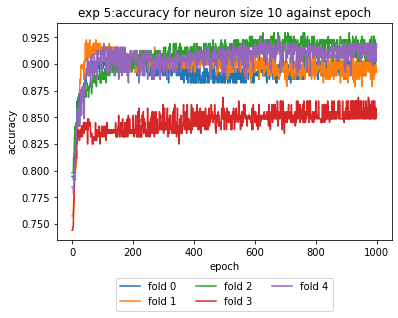

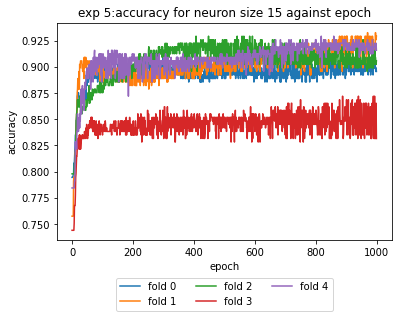

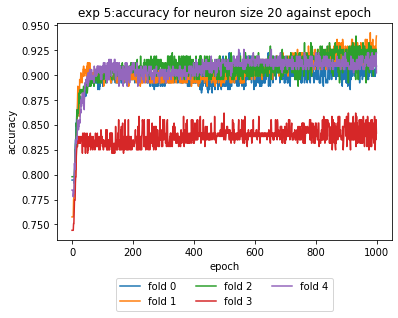

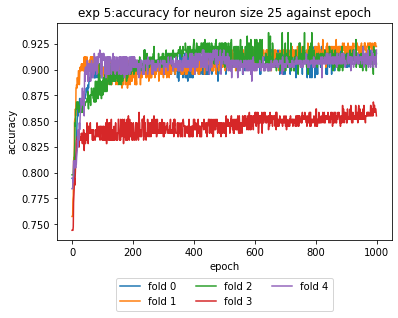

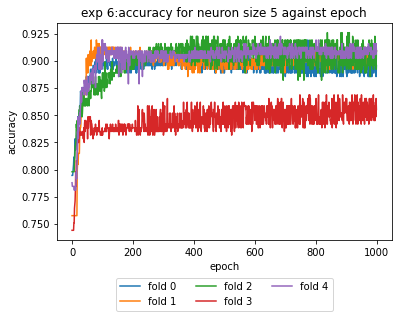

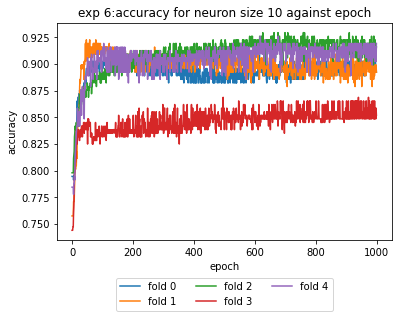

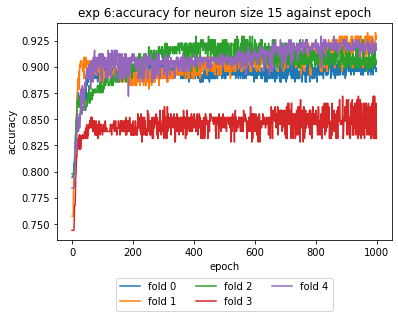

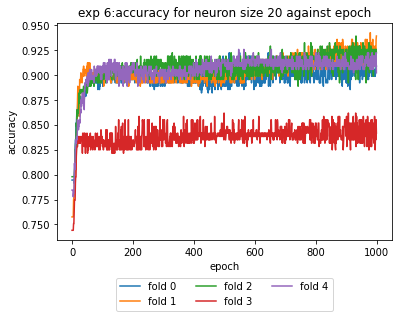

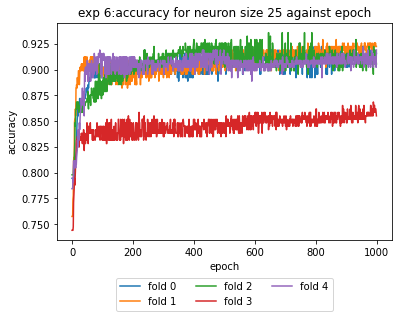

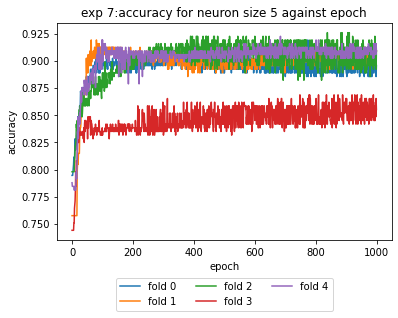

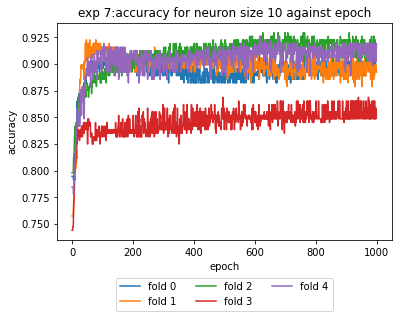

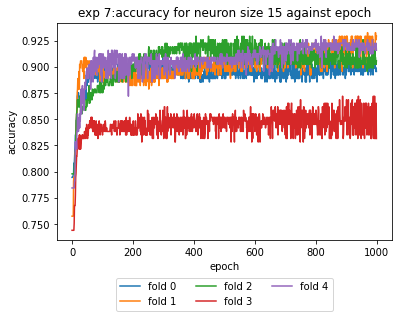

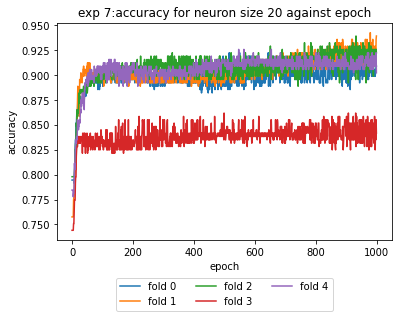

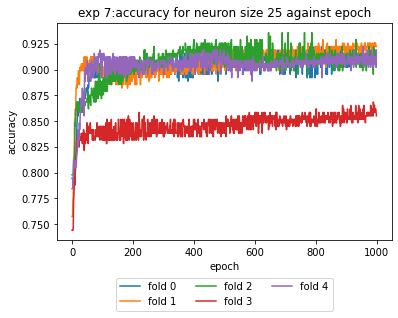

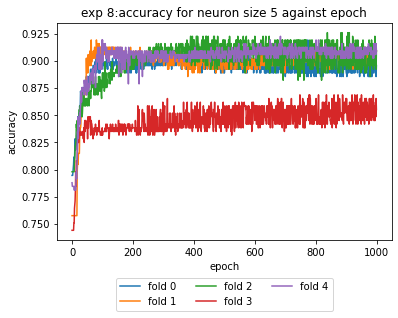

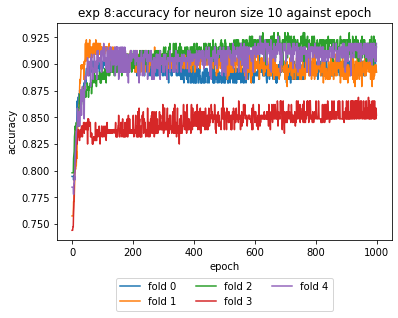

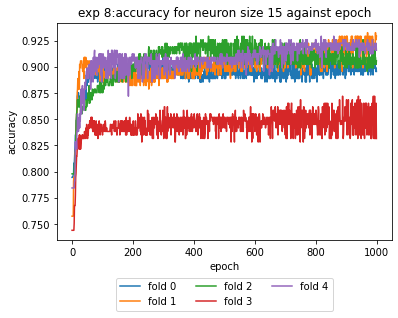

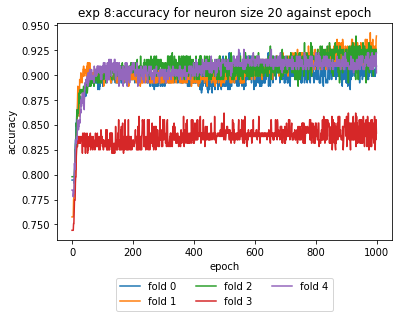

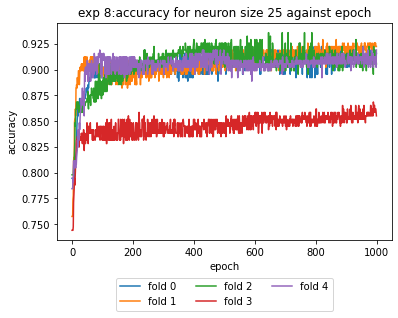

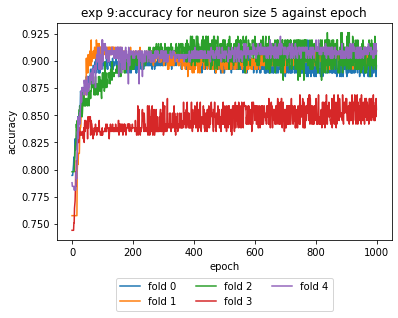

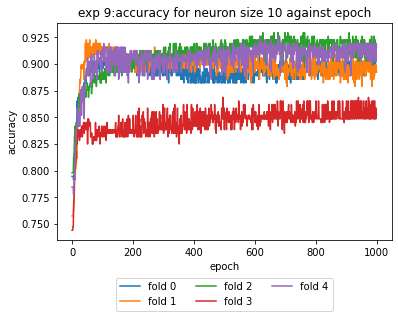

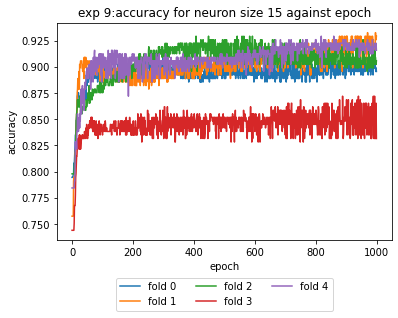

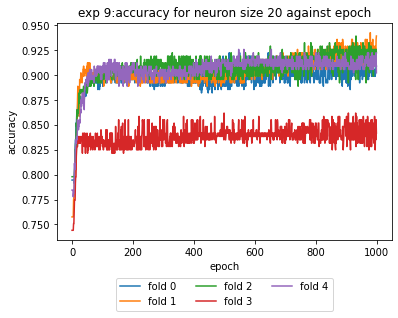

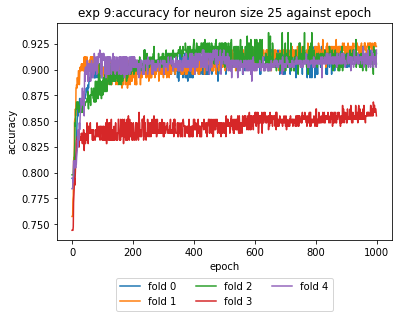

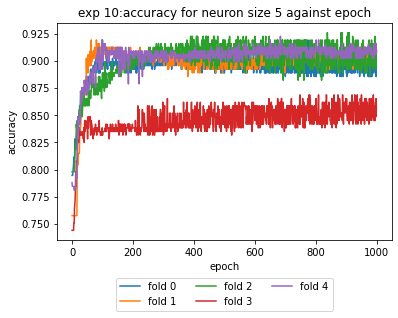

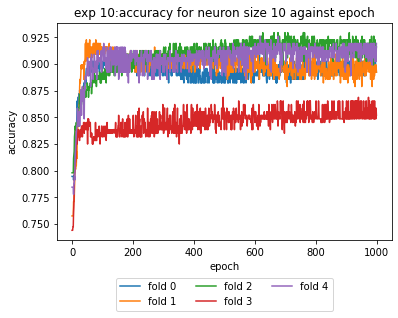

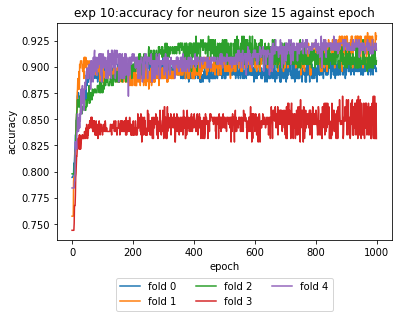

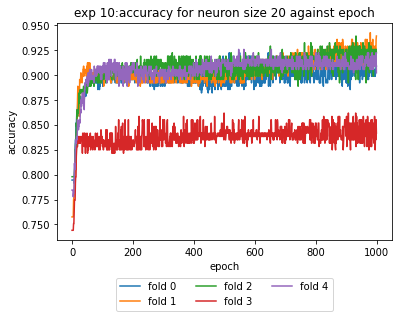

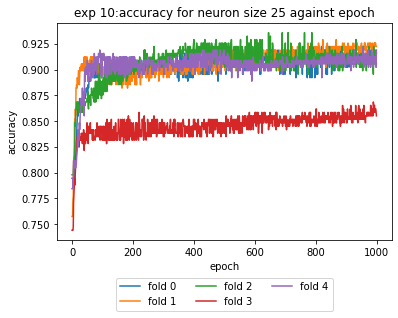

In [19]:
for i in range(no_exps):
    for n in range(len(hidden_units)):
        plt.plot(test_acc[n], label='fold 0')
        plt.plot(test_acc[n+5], label='fold 1')
        plt.plot(test_acc[n+10], label='fold 2')
        plt.plot(test_acc[n+15], label='fold 3')  
        plt.plot(test_acc[n+20], label='fold 4')    
        plt.title('exp %s:accuracy for neuron size %d against epoch'%(i+1,hidden_units[n]))
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.savefig("./%s/ex%d_acc_ns%d_vs_e.png"%(save_path,i+1,hidden_units[n]))
        plt.show()


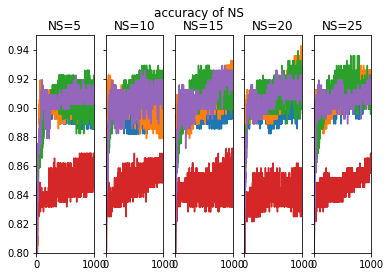

In [37]:
fig,axs = plt.subplots(1,5, sharey = True)
fig.suptitle('accuracy of NS')
fig.savefig("./%s/a_ns_VS_e.png"%(save_path))
for n in range(len(hidden_units)):
    axs[n].axis([0, 1000, 0.800, 0.950])
    axs[n].set_title("NS=%d"%(hidden_units[n]))
    axs[n].plot(test_acc[n], label='fold 0')
    axs[n].plot(test_acc[n+5], label='fold 1')
    axs[n].plot(test_acc[n+10], label='fold 2')
    axs[n].plot(test_acc[n+15], label='fold 3')  
    axs[n].plot(test_acc[n+20], label='fold 4')    
    
#     axs[n].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
#     axs[n].ylabel('accuracy')
#     axs[n].xlabel('epoch')
#     plt.savefig("./%s/ex%d_acc_ns%d_vs_e.png"%(save_path,i+1,hidden_units[n]))


Text(0, 0.5, 'test error')

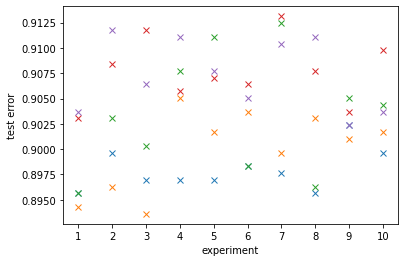

In [45]:
plt.plot(range(no_exps), acc, marker = 'x', linestyle = 'None')
plt.xticks(range(no_exps), np.arange(no_exps)+1)
plt.xlabel('experiment')
plt.ylabel('test error')